## Build attendances dataframe

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [5]:
home_path = "../Resources/EPL_teams/Home"
away_path = "../Resources/EPL_teams/Away"
out_path  = "../Resources/EPL_teams"

In [6]:
# This order gives the team ID.   EPL{index}, i.e. Arsenal=EPL0
EPL_teams = [
 'Arsenal',
 'Aston',
 'Bournemouth',
 'Brighton',
 'Burnley',
 'Chelsea',
 'Crystal',
 'Everton',
 'Leicester',
 'Liverpool',
 'Man_City',
 'Man_United',
 'Newcastle',
 'Norwich',
 'Sheffield',
 'Southampton',
 'Tottenham',
 'Watford',
 'WestHam',
 'Wolves']

In [7]:
cols = ["Div", "Team", "Team ID", "Date", "Opponent", "Attendance"]
home_all_df = pd.DataFrame(columns=cols)
away_all_df = pd.DataFrame(columns=cols) 

In [8]:
for team in EPL_teams:
    home_file = os.path.join(home_path, team+"_home_attendances.csv")
    away_file = os.path.join(away_path, team+"_away_attendances.csv")
    home_df = pd.read_csv(home_file)
    away_df = pd.read_csv(away_file)
    #print(team, home_df["Attendance"].sum())
    #print(team, away_df["Attendance"].sum())
    home_df["Div"] = "E0"
    home_df["Team"] = team
    home_df["Team ID"] = "EPL"+str(EPL_teams.index(team))
    away_df["Div"] = "E0"
    away_df["Team"] = team
    away_df["Team ID"] = "EPL"+str(EPL_teams.index(team))
    home_all_df = home_all_df.append(home_df[cols], ignore_index=True)
    away_all_df = away_all_df.append(away_df[cols], ignore_index=True)

In [38]:
home_all_df.to_csv(out_path+"England_home_allmatches_att.csv")
away_all_df.to_csv(out_path+"England_away_allmatches_att.csv")

### Attendances statistic analysis

In [47]:
def att_stat(all_df, teams):
    gp_team = all_df.groupby("Team ID")
    tstat = []
    for i in range(len(teams)):
        team_id = "EPL"+str(i)
        team_df = gp_team.get_group(team_id)
        tstat.append(team_df["Attendance"].agg(['mean','median','std']))
    return pd.DataFrame({
            "Mean" : [tstat[i][0] for i in range(len(teams))],
            "Median" : [tstat[i][1] for i in range(len(teams))],
            "Std" : [tstat[i][2] for i in range(len(teams))]},
            index = teams)

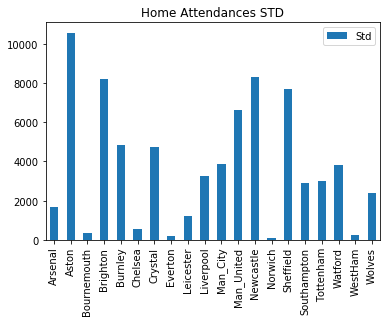

In [48]:
home_stat = att_stat(home_all_df, EPL_teams)
home_stat.plot(kind="bar", y='Std', title="Home Attendances STD")

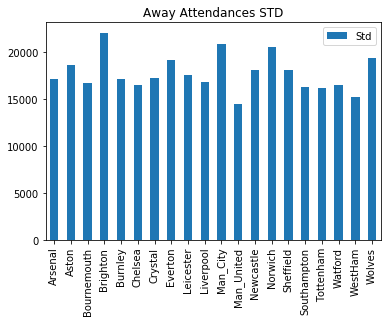

In [49]:
away_stat = att_stat(away_all_df, EPL_teams)
away_stat.plot(kind="bar", y='Std', title="Away Attendances STD")